# central_core_J_14_13

bad.

## Signal extraction and model fitting

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# User-configurable information about the cube
from astropy import units as u
results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/'
freq_spw = '257_spw45'
fmin = 255.309*u.GHz
fmax = 257.182*u.GHz

In [29]:
# from lte_modeling_tools import get_molecular_parameters
# ch3cn_freqs, ch3cn_A, ch3cn_g, ch3cn_E_U, ch3cn_partfunc = get_molecular_parameters('CH3CN', fmin=fmin, fmax=fmax, catalog='JPL')
# ch3cn_freqs

<Quantity [256694.5591, 256817.163 , 256930.1393, 257033.4438, 257127.0354] MHz>

In [11]:
# Import the cube
from spectral_cube import SpectralCube
cube = SpectralCube.read(results+'source_ab_'+freq_spw+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image')
cube

/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


DaskVaryingResolutionSpectralCube with shape=(3840, 512, 512) and unit=Jy / beam and chunk size (128, 256, 512):
 n_x:    512  type_x: RA---SIN  unit_x: deg    range:   266.528130 deg:  266.560501 deg
 n_y:    512  type_y: DEC--SIN  unit_y: deg    range:   -28.719152 deg:  -28.690763 deg
 n_s:   3840  type_s: FREQ      unit_s: Hz     range: 255308020805.109 Hz:257182502433.963 Hz

In [12]:
# rm /home/abulatek/.astropy/cache/astroquery/Splatalogue/*.pickle

In [13]:
import astroquery
astroquery.__version__

'0.4.7.dev7672'

In [14]:
from astroquery.splatalogue import Splatalogue
Splatalogue.query_lines(min_frequency = fmin, max_frequency = fmax, chemical_name = 'CH3CN', cache = False)

# Splatalogue.query_lines??

Species,Chemical Name,"Freq-GHz(rest frame,redshifted)","Freq Err(rest frame,redshifted)","Meas Freq-GHz(rest frame,redshifted)","Meas Freq Err(rest frame,redshifted)",Resolved QNs,CDMS/JPL Intensity,S<sub>ij</sub>&#956;<sup>2</sup> (D<sup>2</sup>),S<sub>ij</sub>,Log<sub>10</sub> (A<sub>ij</sub>),Lovas/AST Intensity,E_L (cm^-1),E_L (K),E_U (cm^-1),E_U (K),Linelist
str8,str14,float64,float64,int64,int64,str21,float64,float64,float64,float64,int64,float64,float64,float64,float64,str5
CH3CNv=0,Methyl Cyanide,256.694233,3.9e-05,--,--,"14(13)-13(13),F=14-13",0.0,9.78409,0.639,-4.17768,--,892.349,1283.88378,900.9114,1296.20309,SLAIM
CH3CNv=0,Methyl Cyanide,256.6945591,3e-07,--,--,14(13)-13(13),-4.6189,40.88178,2.65779,-3.85771,--,892.3609,1283.91664,900.92331,1296.23611,JPL
CH3CNv=0,Methyl Cyanide,256.694613,1.7e-05,--,--,14(13)-13(13),0.0,29.52989,1.9286,-3.69794,--,892.349,1283.88378,900.91141,1296.2031,SLAIM
CH3CNv=0,Methyl Cyanide,256.694799,3.9e-05,--,--,"14(13)-13(13),F=15-14",0.0,10.51905,0.687,-4.14623,--,892.349,1283.88378,900.91142,1296.20311,SLAIM
CH3CNv=0,Methyl Cyanide,256.694849,3.9e-05,--,--,"14(13)-13(13),F=13-12",0.0,9.11038,0.595,-4.20867,--,892.349,1283.88378,900.91142,1296.20311,SLAIM
CH3CNv=0,Methyl Cyanide,256.816873,2.5e-05,--,--,"14(12)-13(12),F=14-13",0.0,19.12415,1.249,-3.886,--,768.945,1106.33397,777.51149,1118.65916,SLAIM
CH3CNv=0,Methyl Cyanide,256.817163,3e-07,--,--,14(12)-13(12),-3.7758,157.46263,10.23691,-3.57247,--,768.9526,1106.35847,777.5191,1118.68383,JPL
CH3CNv=0,Methyl Cyanide,256.817206,1.5e-05,--,--,14(12)-13(12),0.0,56.87176,3.7143,-3.41268,--,768.945,1106.33397,777.5115,1118.65918,SLAIM
CH3CNv=0,Methyl Cyanide,256.817357,2.5e-05,--,--,"14(12)-13(12),F=15-14",0.0,20.25721,1.323,-3.861,--,768.945,1106.33397,777.5115,1118.65919,SLAIM


In [15]:
import cryptography
cryptography.__version__

'2.3.1'

In [16]:
cube.find_lines(chemical_name='CH3CN', line_lists=['JPL'], show_upper_degeneracy=True, show_qn_code=True)

Species,Chemical Name,"Freq-GHz(rest frame,redshifted)","Freq Err(rest frame,redshifted)","Meas Freq-GHz(rest frame,redshifted)","Meas Freq Err(rest frame,redshifted)",Resolved QNs,CDMS/JPL Intensity,S<sub>ij</sub>&#956;<sup>2</sup> (D<sup>2</sup>),S<sub>ij</sub>,Log<sub>10</sub> (A<sub>ij</sub>),Lovas/AST Intensity,E_L (cm^-1),E_L (K),E_U (cm^-1),E_U (K),Upper State Degeneracy,Quantum Number Code,Linelist
str8,str14,float64,float64,int64,int64,str13,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,str3
CH3CNv=0,Methyl Cyanide,256.6945591,3e-07,--,--,14(13)-13(13),-4.6189,40.88178,2.65779,-3.85771,--,892.3609,1283.91664,900.92331,1296.23611,58.0,202,JPL
CH3CNv=0,Methyl Cyanide,256.817163,3e-07,--,--,14(12)-13(12),-3.7758,157.46263,10.23691,-3.57247,--,768.9526,1106.35847,777.5191,1118.68383,116.0,202,JPL
CH3CNv=0,Methyl Cyanide,256.9301393,3e-07,--,--,14(11)-13(11),-3.6807,113.55495,7.3824,-3.41284,--,655.3138,942.85652,663.88407,955.1873,58.0,202,JPL
CH3CNv=0,Methyl Cyanide,257.0334438,2e-07,--,--,14(10)-13(10),-3.3568,145.36812,9.45063,-3.30506,--,551.4702,793.44777,560.04391,805.78351,58.0,202,JPL
CH3CNv=0,Methyl Cyanide,257.1270354,2e-07,--,--,14(9)-13(9),-2.7812,348.26963,22.6416,-3.22616,--,457.4452,658.16589,466.02203,670.50612,116.0,202,JPL


In [17]:
# Get region for central core
import regions
reg = regions.Regions.read('centralcoreellipse.reg')

In [18]:
# Create a subcube cutout from that central core region
scube = cube.subcube_from_regions(reg)
scube

DaskVaryingResolutionSpectralCube with shape=(3840, 17, 17) and unit=Jy / beam and chunk size (128, 10, 17):
 n_x:     17  type_x: RA---SIN  unit_x: deg    range:   266.543777 deg:  266.544790 deg
 n_y:     17  type_y: DEC--SIN  unit_y: deg    range:   -28.705319 deg:  -28.704431 deg
 n_s:   3840  type_s: FREQ      unit_s: Hz     range: 255308020805.109 Hz:257182502433.963 Hz

In [19]:
# Get the moment 0 map for the 0 and 1 components of the subcube
m0 = scube.spectral_slab(fmin, fmax).moment0() # Frequencies estimated by eye?
m0.quicklook()

/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/radio_beam-0.3.3-py3.7.egg/radio_beam/multiple_beams.py:265: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


In [20]:
# Extract the spectrum for the brightest pixel in the moment 0 map
import numpy as np
brightest_pixel = np.unravel_index(np.nanargmax(m0), m0.shape)
spec_for_max_pixel = scube[:, brightest_pixel[0], brightest_pixel[1]]
spec_for_max_pixel

<VaryingResolutionOneDSpectrum [0.03016076,0.0291465 ,0.02970396,...,
                                0.02780221,0.02563288,0.        ] Jy / beam>

In [21]:
# Get conversion factor to convert spectrum from Jy/beam to K
jtok = spec_for_max_pixel.beams.common_beam().jtok(spec_for_max_pixel.spectral_axis).mean()

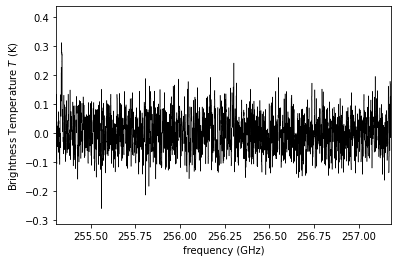

In [22]:
# Put spectrum into pyspeckit, including continuum subtraction
import pyspeckit
from pyspeckit.spectrum.models.lte_molecule import get_molecular_parameters, generate_fitter
from pyspeckit.spectrum.models import lte_molecule
from pyspeckit.spectrum.models.model import SpectralModel
sp = pyspeckit.Spectrum(data = (spec_for_max_pixel - np.median(spec_for_max_pixel.quantity)) * jtok/spec_for_max_pixel.unit, 
                        xarr = spec_for_max_pixel.spectral_axis.to(u.GHz))
sp.plotter(xmin = fmin, xmax = fmax)

In [23]:
# Set up parameters for fitting
v_cen = 40*u.km/u.s
v_disp = 2*u.km/u.s
temp = 167*u.K
N_tot = 1e16*u.cm**-2

In [24]:
# Set up fitter for CH3CN lines
species = 'CH3CN'
freqs, aij, deg, EU, partfunc = get_molecular_parameters(species, fmin = fmin, fmax = fmax)
# mod = lte_molecule.generate_model(sp.xarr, v_cen, v_disp, temp, N_tot,
#                                   freqs, aij, deg, EU, partfunc)
### Why do we need to make the above model?

def modfunc(xarr, vcen, width, tex, column, fillingfactor = 1):
    if column < 100:
        column = 10**column # Cheat by being able to put column density either in log form or not
    return lte_molecule.generate_model(xarr, vcen, width, tex, column, freqs, aij, deg, EU, partfunc)*fillingfactor

fitter = SpectralModel(modfunc, 5,
            parnames=['shift','width','tex','column','ff'],
            parlimited=[(False,False),(True,False),(True,False),(True,False),(True,True)],
            parlimits=[(0,0), (0,0), (0,0),(0,0),(0,1)],
            shortvarnames=(r'v_{cen}',r'v_{disp}','T_{ex}','N_{tot}','ff'),
            centroid_par='shift',
            )
fitter.__name__ = "CH3CN"

sp.specfit.Registry.multifitters['CH3CN'] = fitter
sp.specfit.Registry.npars['CH3CN'] = 5

support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.


(-0.5, 3.0)

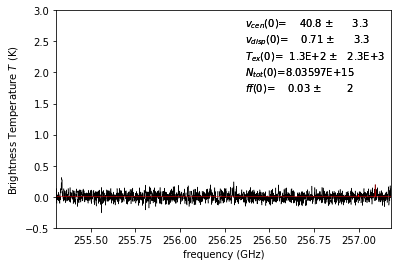

In [25]:
sp.specfit(fittype = 'CH3CN', guesses=[40.1, 1.5, 195.1, 1e16, 1], use_lmfit = False) # Used to be True; kernel didn't recognize pip install
sp.plotter(xmin = fmin, xmax = fmax)
sp.specfit.plot_fit()
sp.plotter.axis.set_ylim(-0.5, 3)

## Rotational diagram fitting of central core maximum

In [26]:
# Get noise level for spectrum
from astropy.stats import mad_std
noise_level = mad_std(sp.data)*u.K
print(noise_level)

0.060156957124170594 K


In [27]:
# Measure and convert integrated intensities
from pyspeckit.spectrum.models.lte_molecule import nupper_of_kkms

log_N_upper_gs = []
log_N_upper_g_errs = []

plots = False

kmax = len(freqs) - 1 # Maximum rotational quantum number for the ladder
for i in range(len(freqs)): # i is the index of the loop
    kk = kmax - i # Get rotational quantum number of this iteration
    
    if kk == 0 or kk == 1:
        # Center spectrum on k = 0 component, extract, then convert new spectrum to GHz
        sp.xarr.convert_to_unit(u.km/u.s, refX = freqs[kmax - 0], velocity_convention = 'radio')
        new_sp_0 = sp.slice(v_cen - 4.5*u.km/u.s, v_cen + 4.5*u.km/u.s)
        new_sp_0.xarr.convert_to_unit(u.GHz, refX = freqs[kmax - 0], velocity_convention = 'radio')
        print(f"k = 0: {np.min(new_sp_0.xarr)}, {np.max(new_sp_0.xarr)}")
        if plots == True:
            new_sp_0.plotter()
        # Convert the original spectrum back to frequency units (doing this twice preserves the spectrum... maybe?)
        sp.xarr.convert_to_unit(u.GHz, refX = freqs[kmax - 0], velocity_convention = 'radio')
        
        # Center spectrum on k = 1 component, extract
        sp.xarr.convert_to_unit(u.km/u.s, refX = freqs[kmax - 1], velocity_convention = 'radio')
        new_sp_1 = sp.slice(v_cen - 4.5*u.km/u.s, v_cen + 4.5*u.km/u.s)
        new_sp_1.xarr.convert_to_unit(u.GHz, refX = freqs[kmax - 1], velocity_convention = 'radio')
        print(f"k = 1: {np.min(new_sp_1.xarr)}, {np.max(new_sp_1.xarr)}")
        if plots == True:
            new_sp_1.plotter()
        # Convert the original spectrum back to frequency units (doing this twice preserves the spectrum... maybe?)
        sp.xarr.convert_to_unit(u.GHz, refX = freqs[kmax - 1], velocity_convention = 'radio')

        # Get frequency range we want: highest freq in k = 1, highest freq in k = 0
        highest_freq_1 = np.max(new_sp_1.xarr)
        highest_freq_0 = np.max(new_sp_0.xarr)
        # Get extra part of k = 0 that's not in k = 1 cube
        extra_part_of_0 = new_sp_0.slice(highest_freq_1, highest_freq_0)
        print(f"Part of k = 0 that's not in k = 1: {np.min(extra_part_of_0.xarr)}, {np.max(extra_part_of_0.xarr)}")
        if plots == True:
            extra_part_of_0.plotter()
        # Convert back to velocities for correct units in mom0 map
        extra_part_of_0.xarr.convert_to_unit(u.km/u.s, refX = freqs[kmax - 0], velocity_convention = 'radio')
        new_sp_1.xarr.convert_to_unit(u.km/u.s, refX = freqs[kmax - 1], velocity_convention = 'radio')

        # Calculate integrated intensity (sum slice and multiply by channel width)
        slice_sum_0 = extra_part_of_0.data.sum()*u.K
        slice_sum_1 = new_sp_1.data.sum()*u.K
        channel_width = np.abs(new_sp_1.xarr.cdelt())
        mom0_sum = (slice_sum_0 + slice_sum_1)*channel_width
        # Split equally between k = 0 and k = 1 component
        mom0 = mom0_sum/2.
    else: 
        # Center spectrum on k = 0 component, extract
        sp.xarr.convert_to_unit(u.km/u.s, refX = freqs[kmax - kk], velocity_convention = 'radio')
        new_sp = sp.slice(v_cen - 4.5*u.km/u.s, v_cen + 4.5*u.km/u.s)
        ## print(f"Plot for k = {kk}:")
        ## new_sp.plotter()
        # Calculate integrated intensity (sum slice and multiply by channel width)
        slice_sum = new_sp.data.sum()*u.K
        channel_width = np.abs(new_sp.xarr.cdelt())
        mom0 = slice_sum*channel_width

        # Convert the original spectrum back to frequency units
        sp.xarr.convert_to_unit(u.GHz, refX = freqs[kmax - kk], velocity_convention = 'radio')

    # Calculate upper state column density from integrated intensity, convert to logscale, and export
    N_upper = nupper_of_kkms(mom0, freqs[kmax - kk], 10**aij[kmax - kk]) # If I don't do 10**aij[kmax - kk], I get nans
    log_N_upper_g = np.log10(N_upper.value/deg[kmax - kk])
    # Propagate error
    noise_map_int = noise_level*channel_width
    N_upper_err = nupper_of_kkms(noise_map_int, freqs[kmax - kk], 10**aij[kmax - kk])
    log_N_upper_g_err = N_upper_err/(N_upper*np.log(10.)) 
    
    log_N_upper_gs.append(log_N_upper_g)
    log_N_upper_g_errs.append(log_N_upper_g_err)
    
log_N_upper_gs = np.array(log_N_upper_gs)
log_N_upper_g_errs = np.array(log_N_upper_g_errs)

k = 0: 257.0887539388497 GHz, 257.0960780400304 GHz
k = 1: 256.99549371714846 GHz, 257.0023295449172 GHz
Part of k = 0 that's not in k = 1: 257.0887539388497 GHz, 257.09558976661845 GHz
k = 0: 257.0887539388497 GHz, 257.0960780400304 GHz
k = 1: 256.99549371714846 GHz, 257.0023295449172 GHz
Part of k = 0 that's not in k = 1: 257.0887539388497 GHz, 257.09558976661845 GHz


In [28]:
# Convert to natural log for fitting
ln_N_upper_gs = np.log(10**(log_N_upper_gs))
ln_N_upper_g_errs = np.log(10**(log_N_upper_g_errs))

# Note to self: do not reverse EU; we are looping over frequency now, 
# and in temperature map, we were looping over k-component index
print("Energies:", EU)
print("Column densities:", ln_N_upper_gs)

Energies: [1.78963537e-13 1.54449959e-13 1.31876975e-13 1.11249691e-13
 9.25727540e-14]
Column densities: [20.01067352 20.17699227 20.43033603 20.265614   19.39156187]


In [29]:
from scipy.optimize import curve_fit
from astropy import constants

def linear(x, m, b):
    return m*x + b

# Do the simple linear fit
EU_converted = (EU*u.erg/constants.k_B).decompose()

# good_energy_filter = EU_converted < 180*u.K
# EU_converted = EU_converted[good_energy_filter]
# ln_N_upper_gs = ln_N_upper_gs[good_energy_filter]
# ln_N_upper_g_errs = ln_N_upper_g_errs[good_energy_filter]

# Note to self: convert to K from ergs to do the fit, because in ergs, 
# these energies are small numbers, and that can makes the fit not works
popt, pcov = curve_fit(linear, EU_converted, ln_N_upper_gs, sigma = ln_N_upper_g_errs)
slope, intercept = popt[0], popt[1]
temp_fit = (-1./slope)*u.K
N_tot_fit = np.log10(np.exp(intercept)*partfunc(temp_fit))

In [32]:
plt.rcParams['figure.facecolor'] = 'w' # Sometimes I have to re-run this? So I'm moving it down here

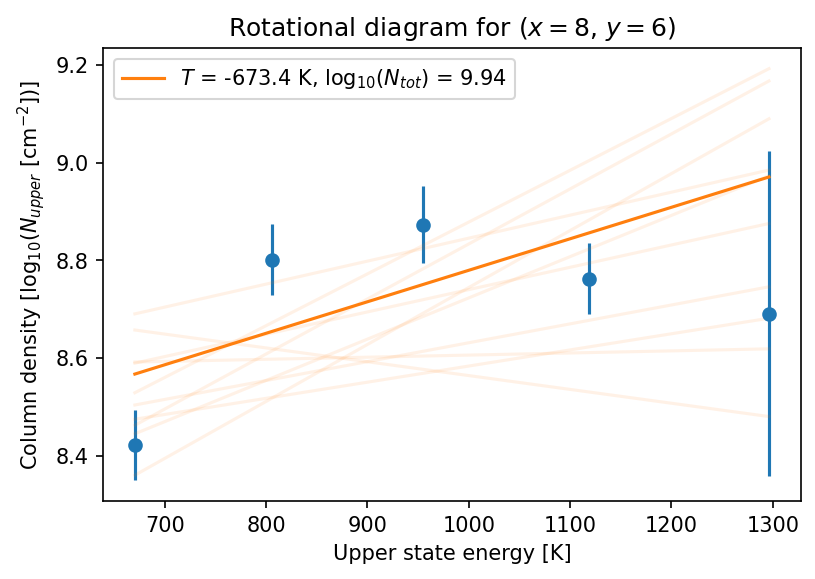

In [33]:
plot_uncertainties = True

plt.figure(dpi = 150)
# plt.scatter(EU_converted, np.log10(np.exp(ln_N_upper_gs)), color = 'tab:blue')
plt.errorbar(EU_converted, np.log10(np.exp(ln_N_upper_gs)), yerr = np.log10(np.exp(ln_N_upper_g_errs)), fmt = 'o')

plt.plot(EU_converted, np.log10(np.exp(EU_converted.value*slope+intercept)),
         color = 'tab:orange',
         label = f"$T$ = {temp_fit:.1f}, $\log_{{10}}(N_{{tot}})$ = {N_tot_fit:.2f}")

if plot_uncertainties == True:
    rng = np.random.default_rng()
    rv = rng.multivariate_normal(popt, pcov, 10)
    for param in rv:
        slope_i, intercept_i = param[0], param[1]
        temp_i = (-1./slope_i)*u.K
        total_col_density_i = np.log10(np.exp(intercept_i)*partfunc(temp_i))
        plt.plot(EU_converted, np.log10(np.exp(EU_converted.value*slope_i+intercept_i)), 
                 alpha = 0.1, color = 'tab:orange') 

plt.title(f"Rotational diagram for ($x = ${brightest_pixel[1]}, $y = ${brightest_pixel[0]})")
plt.xlabel(f"Upper state energy [K]")
plt.ylabel(f"Column density [$\log_{{10}}(N_{{upper}}\ [\mathrm{{cm}}^{{-2}}])$]")
        
plt.legend()